In [31]:
from torch import BoolTensor, IntTensor, Tensor
from torchmetrics.detection.mean_ap import MeanAveragePrecision

# Preds should be a list of elements, where each element is a dict
# containing 3 keys: boxes, scores, labels
targets = [
    {
        "boxes": Tensor([[0, 0, 100, 100]]),
        "labels": IntTensor([0]),
    }
]

targets2 = [
    {
        "boxes": Tensor([]),
        "labels": IntTensor([]),
    }
]

preds = [
    {
        "boxes": Tensor([[20, 0, 100, 100]]),
        "scores": Tensor([1]),
        "labels": IntTensor([0]),
    }
]

preds2 = [
    {
        "boxes": Tensor([]),
        "scores": Tensor([]),
        "labels": IntTensor([]),
    }
]


# Initialize metric
metric = MeanAveragePrecision(box_format="xywh", iou_type="bbox")

# Update metric with predictions and respective ground truth
metric.update(preds, targets2)

# Compute the results
result = metric.compute()
print(result)


{'map': tensor(-1.), 'map_50': tensor(-1.), 'map_75': tensor(-1.), 'map_small': tensor(-1.), 'map_medium': tensor(-1.), 'map_large': tensor(-1.), 'mar_1': tensor(-1.), 'mar_10': tensor(-1.), 'mar_100': tensor(-1.), 'mar_small': tensor(-1.), 'mar_medium': tensor(-1.), 'mar_large': tensor(-1.), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor(0, dtype=torch.int32)}


In [30]:
import numpy as np
import supervision as sv

targets = [
    np.array([[0, 0, 100, 100, 0]]),
]

preds = [
    np.array([[20, 0, 120, 100, 0, 1]]),
]

mean_average_precision = sv.MeanAveragePrecision.from_tensors(
    predictions=preds,
    targets=targets,
)
mean_average_precision

MeanAveragePrecision(map50_95=0.398, map50=0.995, map75=0.0, per_class_ap50_95=array([[0.995, 0.995, 0.995, 0.995, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]]))

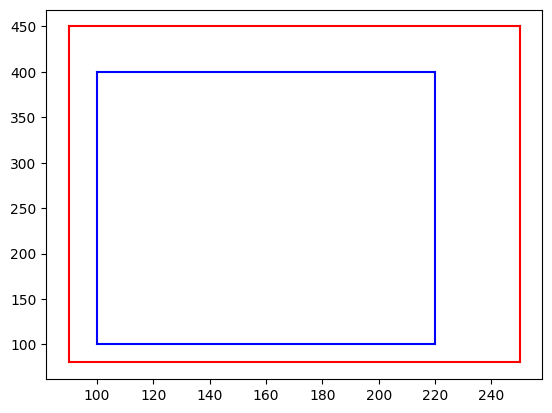

0.6097503808742529


In [45]:
groundTruth = [90, 80, 250, 450] # [x1, y1, x2, y2]
prediction = [100, 100, 220, 400] # [x1, y1, x2, y2]

# plot the ground truth and prediction rectangles
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([groundTruth[0], groundTruth[2]], [groundTruth[1], groundTruth[1]], color='r')
ax.plot([groundTruth[0], groundTruth[2]], [groundTruth[3], groundTruth[3]], color='r')
ax.plot([groundTruth[0], groundTruth[0]], [groundTruth[1], groundTruth[3]], color='r')
ax.plot([groundTruth[2], groundTruth[2]], [groundTruth[1], groundTruth[3]], color='r')

ax.plot([prediction[0], prediction[2]], [prediction[1], prediction[1]], color='b')
ax.plot([prediction[0], prediction[2]], [prediction[3], prediction[3]], color='b')
ax.plot([prediction[0], prediction[0]], [prediction[1], prediction[3]], color='b')
ax.plot([prediction[2], prediction[2]], [prediction[1], prediction[3]], color='b')

plt.show()

# calculate the intersection over union (IoU) between the ground truth and prediction
iou = 0
x1 = max(groundTruth[0], prediction[0])
y1 = max(groundTruth[1], prediction[1])
x2 = min(groundTruth[2], prediction[2])
y2 = min(groundTruth[3], prediction[3])

intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
union = (groundTruth[2] - groundTruth[0] + 1) * (groundTruth[3] - groundTruth[1] + 1) + (prediction[2] - prediction[0] + 1) * (prediction[3] - prediction[1] + 1) - intersection
iou = intersection / union
print(iou)